Downloading Yolo

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00


(data_config.yaml) - (include the information of training image path , validation image path and test image , along with classes count)

In [ ]:
import yaml

train_images_path = 'dataset/images/train'
val_images_path = 'dataset/images/val'
test_images_path = 'dataset/images/test'
classes = ['Crop', 'Weed']

data = {
    'train': train_images_path,
    'val': val_images_path,
    'test': test_images_path,
    'nc': len(classes),
    'names': classes
}

with open('data_config.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("YAML file created successfully.")

YAML file created successfully.


Feeding information to yolo8n(nano model for faster processing) , including data_config.yaml , with epochs = 50 

- experiments various epochs like [30, 10, 40 ,50] , out of these 50 gives good result

In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(data="/content/data_config.yaml", epochs=50)
metrics = model.val()
path = model.export(format="onnx")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data_config.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=Fals

- Best Model saved to the directory along with its results 
- Now using saved model called (best.pt), we are testing on test images
- Model scored confidence of above 85% , which is pretty good 
- It suggests that model is neither underfitting nor overfitting the data
- For Visualization of model architecture visit "https://netron.app"

In [ ]:
!yolo predict model='/runs/detect/train/weights/best.pt' source='dataset/images/val/agri_0_1166.jpeg'

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/weeds-detection/dataset/images/val/agri_0_1166.jpeg: 640x640 1 Weed, 215.3ms
Speed: 7.1ms preprocess, 215.3ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo predict model='runs/detect/train/weights/best.pt' source='32237_jpg.rf.1c2e77858eded2654258ca199cddec5e.jpg'

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/32237_jpg.rf.1c2e77858eded2654258ca199cddec5e.jpg: 384x640 2 Weeds, 112.1ms
Speed: 6.5ms preprocess, 112.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


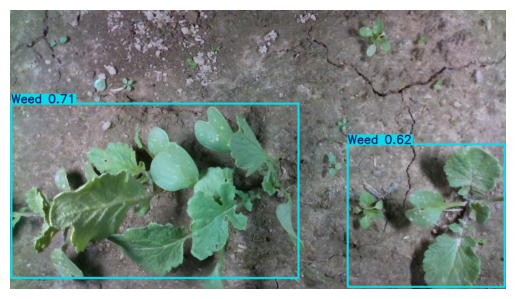

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "runs/detect/predict2/32237_jpg.rf.1c2e77858eded2654258ca199cddec5e.jpg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!yolo predict model='runs/detect/train/weights/best.pt' source='crop_1.jpeg'

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/crop_1.jpeg: 640x640 1 Crop, 172.4ms
Speed: 6.3ms preprocess, 172.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


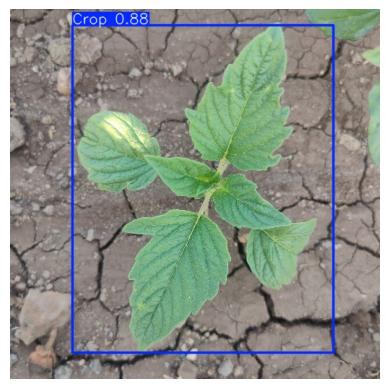

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "runs/detect/predict3/crop_1.jpg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!yolo predict model='runs/detect/train/weights/best.pt' source='/content/weed_1.jpeg'

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/weed_1.jpeg: 640x640 1 Weed, 179.6ms
Speed: 11.4ms preprocess, 179.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


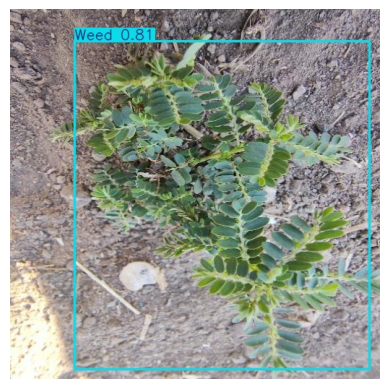

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "runs/detect/predict4/weed_1.jpg"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()